In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# df 변수에 bicycle_out.csv 파일 읽어들인 후 조회하기
df = pd.read_csv('./data/bicycle_out.csv', encoding = 'euc-kr')
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [17]:
# 이상치 확인 - 기초통계
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,396.000000,420.000000,409.000000,405.000000,404.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.258985,26.270667,1.687148,20.237064,3028.272755,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.000000,14.000000,1680.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3757.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


In [18]:
df_drop_allow = df.dropna(axis=0)
df_drop_allow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [19]:
df_drop_allow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    358 non-null    object 
 1   대여일시     358 non-null    object 
 2   대여소번호    358 non-null    int64  
 3   대여소명     358 non-null    object 
 4   대여거치대    358 non-null    float64
 5   반납일시     358 non-null    object 
 6   반납대여소번호  358 non-null    int64  
 7   반납대여소명   358 non-null    object 
 8   반납거치대    358 non-null    float64
 9   이용시간     358 non-null    float64
 10  이용거리     358 non-null    float64
 11  나이       358 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 36.4+ KB


In [23]:
df_drop_allow = df_drop_allow.reset_index(drop=True)
df_drop_allow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [24]:
df_drop_allow.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,239.907821,7.578212,95.011173,2.796089,20.955307,2703.854749,35.159218
std,310.908545,6.185125,23.438336,1.668722,20.041364,3140.612833,32.747653
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000
50%,115.000000,6.000000,101.000000,2.000000,13.000000,1680.000000,29.000000
75%,225.500000,10.000000,101.000000,4.000000,27.000000,3802.500000,39.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


In [26]:
# 100살 이상 나이 데이터 조회하기
df_drop_allow[df_drop_allow['나이'] >= 100]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


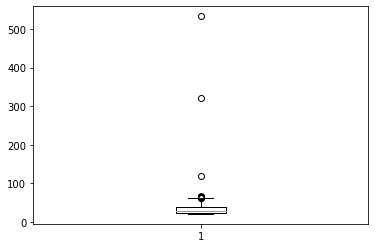

In [27]:
# 이상치 데이터 시각화
# 이상치 확인하는 그래프 : boxplot(박스플롯)
plt.boxplot(df_drop_allow['나이'])
plt.show()

In [30]:
df_drop_allow['나이'].describe()

count    358.000000
mean      35.159218
std       32.747653
min       21.000000
25%       24.000000
50%       29.000000
75%       39.000000
max      533.000000
Name: 나이, dtype: float64

In [ ]:
# 극단치 값 계산하기

In [31]:
import numpy as np

In [34]:
# q1(25%), q3(75%) 데이터 확인하기 - np,percentile()
q1, q3 = np.percentile(df_drop_allow['나이'],[25,75])
print(q1)
print(q3)

24.0
39.0


In [36]:
iqr = q3 - q1
iqr

15.0

- 최소 극단치 (Minimum) : Q1 - 1.5*IQR
- 최대 극단치(Maximum) : Q3 + 1.5 *IQR

In [45]:
# 최대극단치
upper_bound = q3 + (1.5*iqr)
upper_bound

61.5

In [46]:
# 최소극단치
lower_bound = q1 - (1.5*iqr)
lower_bound

1.5

In [49]:
# 나이 데이터 중에 최대/최소 극단치를 벗어나는 데이터 조회하기
condition = (df_drop_allow['나이'] > upper_bound) | (df_drop_allow['나이'] < lower_bound)
df_drop_allow[condition]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [63]:
def outliers_iqr(dframe, data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    
    print(upper_bound)
    print(lower_bound)
    
    condition = (data > upper_bound) | (data < lower_bound)
    
    print(len(dframe[condition]))
    return dframe[condition]

In [64]:
temp = outliers_iqr(df_drop_allow, df_drop_allow['이용거리'])
temp

7901.25
-3028.75
11


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
54,SPB-22668,2019-11-02 16:02,116,일진아이윌아파트 옆,3.0,2019-11-02 16:50,101,(구)합정동 주민센터,4.0,46.0,42070.0,22
83,SPB-18241,2019-11-03 14:26,2103,신림동 우방아파트,3.0,2019-11-03 16:27,101,(구)합정동 주민센터,4.0,121.0,17060.0,24
84,SPB-14209,2019-11-03 14:26,2103,신림동 우방아파트,1.0,2019-11-03 16:28,101,(구)합정동 주민센터,1.0,121.0,16910.0,46
93,SPB-24564,2019-11-03 19:24,182,망원2빗물펌프장 앞,3.0,2019-11-03 20:38,101,(구)합정동 주민센터,1.0,72.0,8530.0,25
140,SPB-06938,2019-11-05 0:37,306,광화문역 7번출구 앞,4.0,2019-11-05 1:11,101,(구)합정동 주민센터,4.0,34.0,8160.0,23
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
243,SPB-17890,2019-11-08 22:03,391,정동길입구,3.0,2019-11-08 22:48,101,(구)합정동 주민센터,3.0,44.0,8120.0,25
261,SPB-00927,2019-11-10 13:45,1998,고척교 교차로,6.0,2019-11-10 14:40,101,(구)합정동 주민센터,4.0,54.0,9310.0,29
296,SPB-17319,2019-11-11 22:46,391,정동길입구,2.0,2019-11-11 23:34,101,(구)합정동 주민센터,2.0,48.0,8290.0,24
340,SPB-07205,2019-11-14 12:07,1160,양천향교역 7번출구앞,1.0,2019-11-14 12:55,101,(구)합정동 주민센터,1.0,47.0,10260.0,25
